In [1]:
import plotly.graph_objects as go
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [3]:
def sigmoid(z):
    
    g = 1.0/(1 + np.exp(-z)  )
    
    return g 

a = np.array([0, 1,2,3])
sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413])

In [4]:
data = np.loadtxt(fname='ex2data1.txt', delimiter=',')

In [5]:
x = np.copy(data[:, :-1])
y = np.copy(data[:, -1])

In [6]:
positive = y == 1 
negative = y == 0 

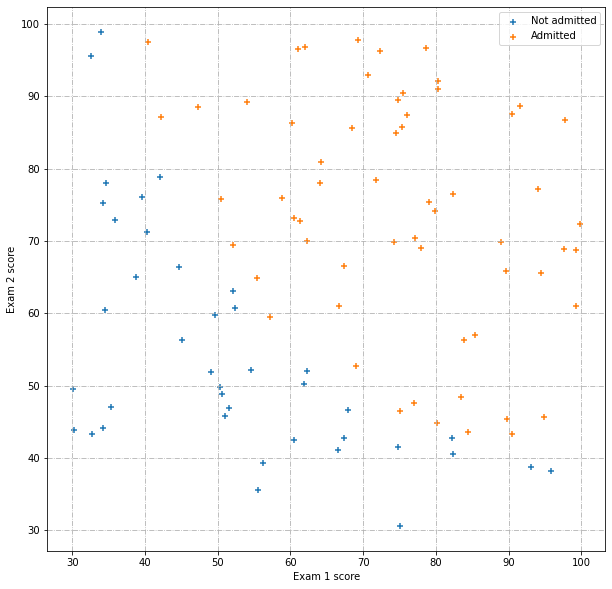

In [7]:
fig, ax = plt.subplots( figsize=(10,10) )

ax.grid(True, linestyle='-.')

plt.scatter(x[negative,0], x[negative,1], marker='+' , label='Not admitted' )
plt.scatter(x[positive,0], x[positive,1], marker='+' , label='Admitted' )
ax.set_xlabel("Exam 1 score")
ax.set_ylabel("Exam 2 score")

ax.legend()
plt.show()

In [8]:
trace_positive = go.Scatter(x=x[positive,0], y=x[positive,1] , mode='markers', name='Admitted', )
trace_negative = go.Scatter(x=x[negative,0], y=x[negative,1] , mode='markers', name='Not admitted')

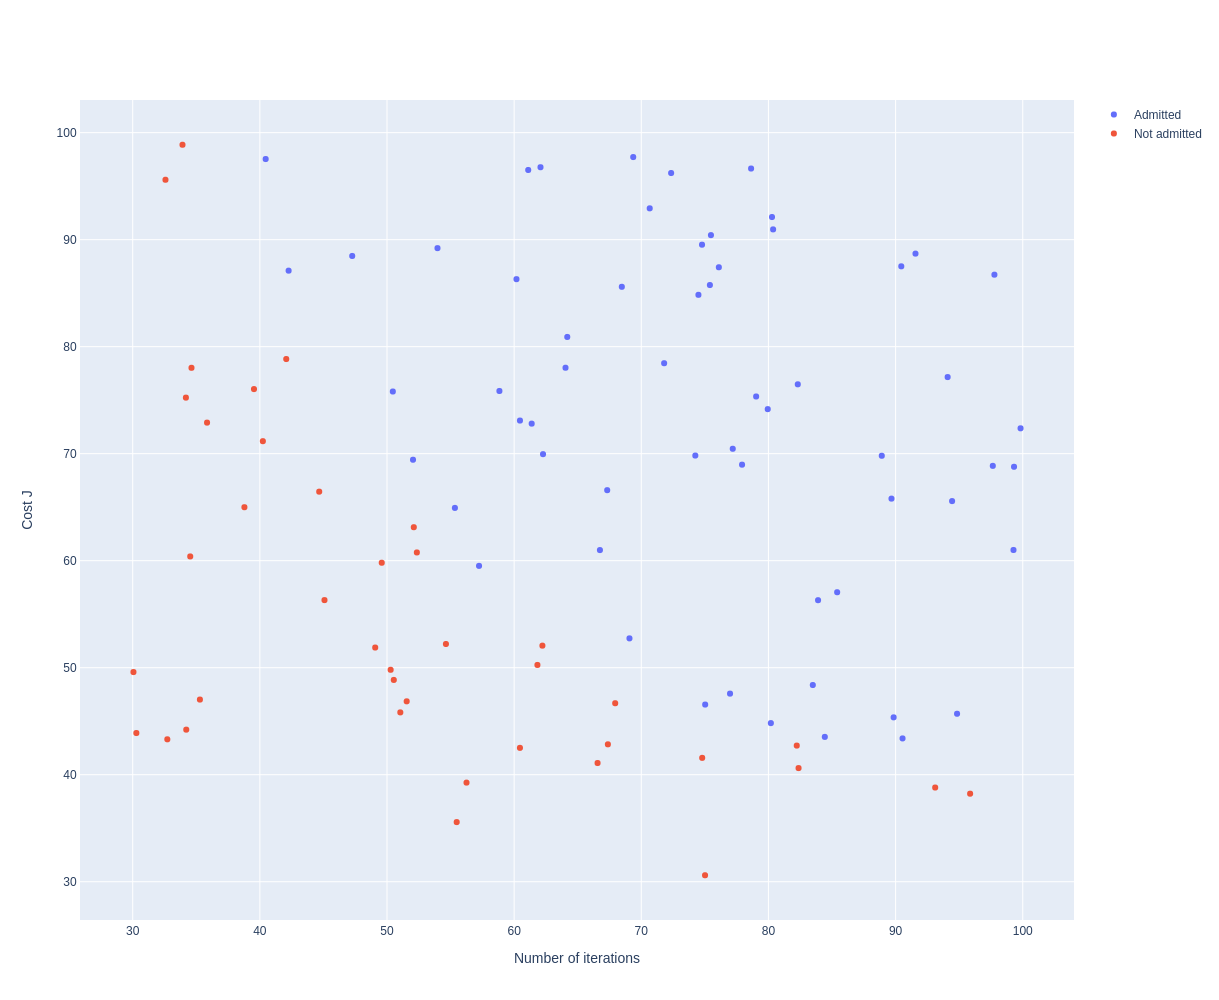

In [9]:
fig_plotly = go.Figure()

layout = go.Layout( autosize=False,
                    width=1000,
                    height=1000,
                    xaxis = dict( title_text = "Number of iterations"),
                    yaxis = dict( title_text = "Cost J") )

fig_plotly.layout = layout
fig_plotly.add_trace( trace_positive )
fig_plotly.add_trace( trace_negative )

In [10]:
m, n = np.shape(x)

In [13]:
X = np.ones([m,np.shape(x)[1]+1])
X[:,1:] = x
X[:5]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

In [16]:
initial_theta = np.zeros(n+1)
initial_theta

array([0., 0., 0.])

In [18]:
theta =np.zeros(n+1) 

In [26]:
np.dot((sigmoid( np.dot(X,theta) ) -y  ),X )

array([  -10.        , -1200.92165893, -1126.28422055])

In [27]:
np.dot((sigmoid( np.dot(X,theta) ) -y  ),X )/m

array([ -0.1       , -12.00921659, -11.26284221])

In [32]:
-y *np.log( sigmoid( np.dot( X, theta ) ) ) - ( 1 - y )*np.log( 1 - sigmoid( np.dot( X,theta ) ) )

array([0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314

In [33]:
np.sum(-y *np.log( sigmoid( np.dot( X, theta ) ) ) - ( 1 - y )*np.log( 1 - sigmoid( np.dot( X,theta ) ) ))/m

0.6931471805599453

In [35]:
def costFunction(theta, X, y):
    
    m = np.shape(y)[0]
    
    J = np.sum(-y *np.log( sigmoid( np.dot( X, theta ) ) ) - ( 1 - y )*np.log( 1 - sigmoid( np.dot( X,theta ) ) ))/m
    
    grad = np.dot((sigmoid( np.dot(X,theta) ) -y  ),X )/m
    
    return J, grad

In [38]:
cost, grad = costFunction( initial_theta, X, y)

In [45]:
print(f'Cost at initial theta (zeros): { cost } ');
print('Expected cost (approx): 0.693');
print('Gradient at initial theta (zeros):');
print(f' { grad }');
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628');

Cost at initial theta (zeros): 0.21833019382659777 
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
 [0.04290299 2.56623412 2.64679737]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


In [46]:
test_theta = [-24, 0.2, 0.2]

In [47]:
cost, grad = costFunction( test_theta, X, y)

In [49]:
print(f'Cost at initial theta (zeros): { cost } ');
print('Expected cost (approx):0.218');
print('Gradient at initial theta (zeros):');
print(f' { grad }');
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647');

Cost at initial theta (zeros): 0.21833019382659777 
Expected cost (approx):0.218
Gradient at initial theta (zeros):
 [0.04290299 2.56623412 2.64679737]
Expected gradients (approx):
 0.043
 2.566
 2.647


# Optimization

To optimize in python i have used from scipy.optimize import minimize, but it requred some changes, like introducing function costFunction2 and constrains_args

In [104]:
def costFunction2(theta, Xy):
    
    return costFunction(theta, Xy[0], Xy[1])[0]

In [105]:
from scipy.optimize import minimize

In [106]:
constrains_args = [X, y]

In [107]:
costFunction2(initial_theta, constrains_args)

0.6931471805599453

In [108]:
res1 = minimize(costFunction2, x0 = initial_theta, args=constrains_args, options ={'disp':True}, method='Nelder-Mead' )

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [115]:
theta = res1.x
cost = costFunction2(theta, constrains_args)

In [118]:
print(f'Cost at theta found by fminunc: {cost} ')
print(f'Expected cost (approx): 0.203');
print(f'theta: ');
print(f' {theta } ');
print(f'Expected theta (approx):');
print(f' -25.161\n 0.206\n 0.201\n');

Cost at theta found by fminunc: 0.20349770159021513 
Expected cost (approx): 0.203
theta: 
 [-25.16130062   0.20623142   0.20147143] 
Expected theta (approx):
 -25.161
 0.206
 0.201



# Plot Decision Boundary

In [139]:
x_boundary = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 111 )
y_boundary = (-1./theta[2]) * (theta[1]* x_boundary   + theta[0])

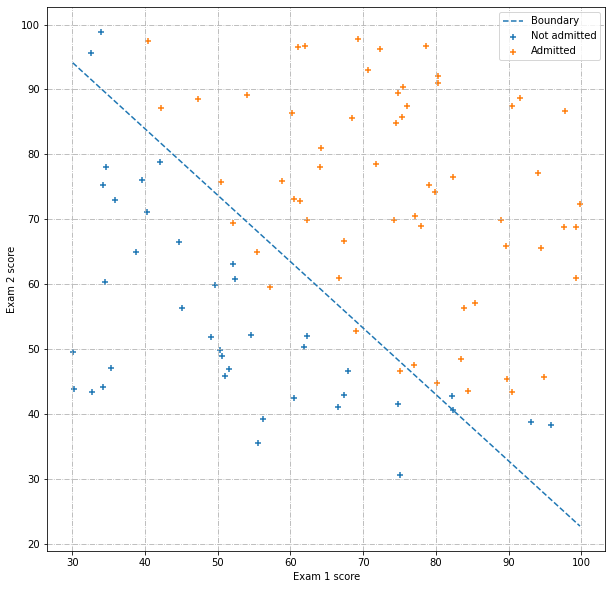

In [140]:
fig, ax = plt.subplots( figsize=(10,10) )

ax.grid(True, linestyle='-.')

plt.scatter(x[negative,0], x[negative,1], marker='+' , label='Not admitted' )
plt.scatter(x[positive,0], x[positive,1], marker='+' , label='Admitted' )
plt.plot(x_boundary, y_boundary, '--',  label='Boundary' )
ax.set_xlabel("Exam 1 score")
ax.set_ylabel("Exam 2 score")

ax.legend()
plt.show()

In [151]:

trace_boundary = go.Scatter(x=x_boundary, y=y_boundary , mode='lines', name='Boundary', line = dict( dash='dash' ))

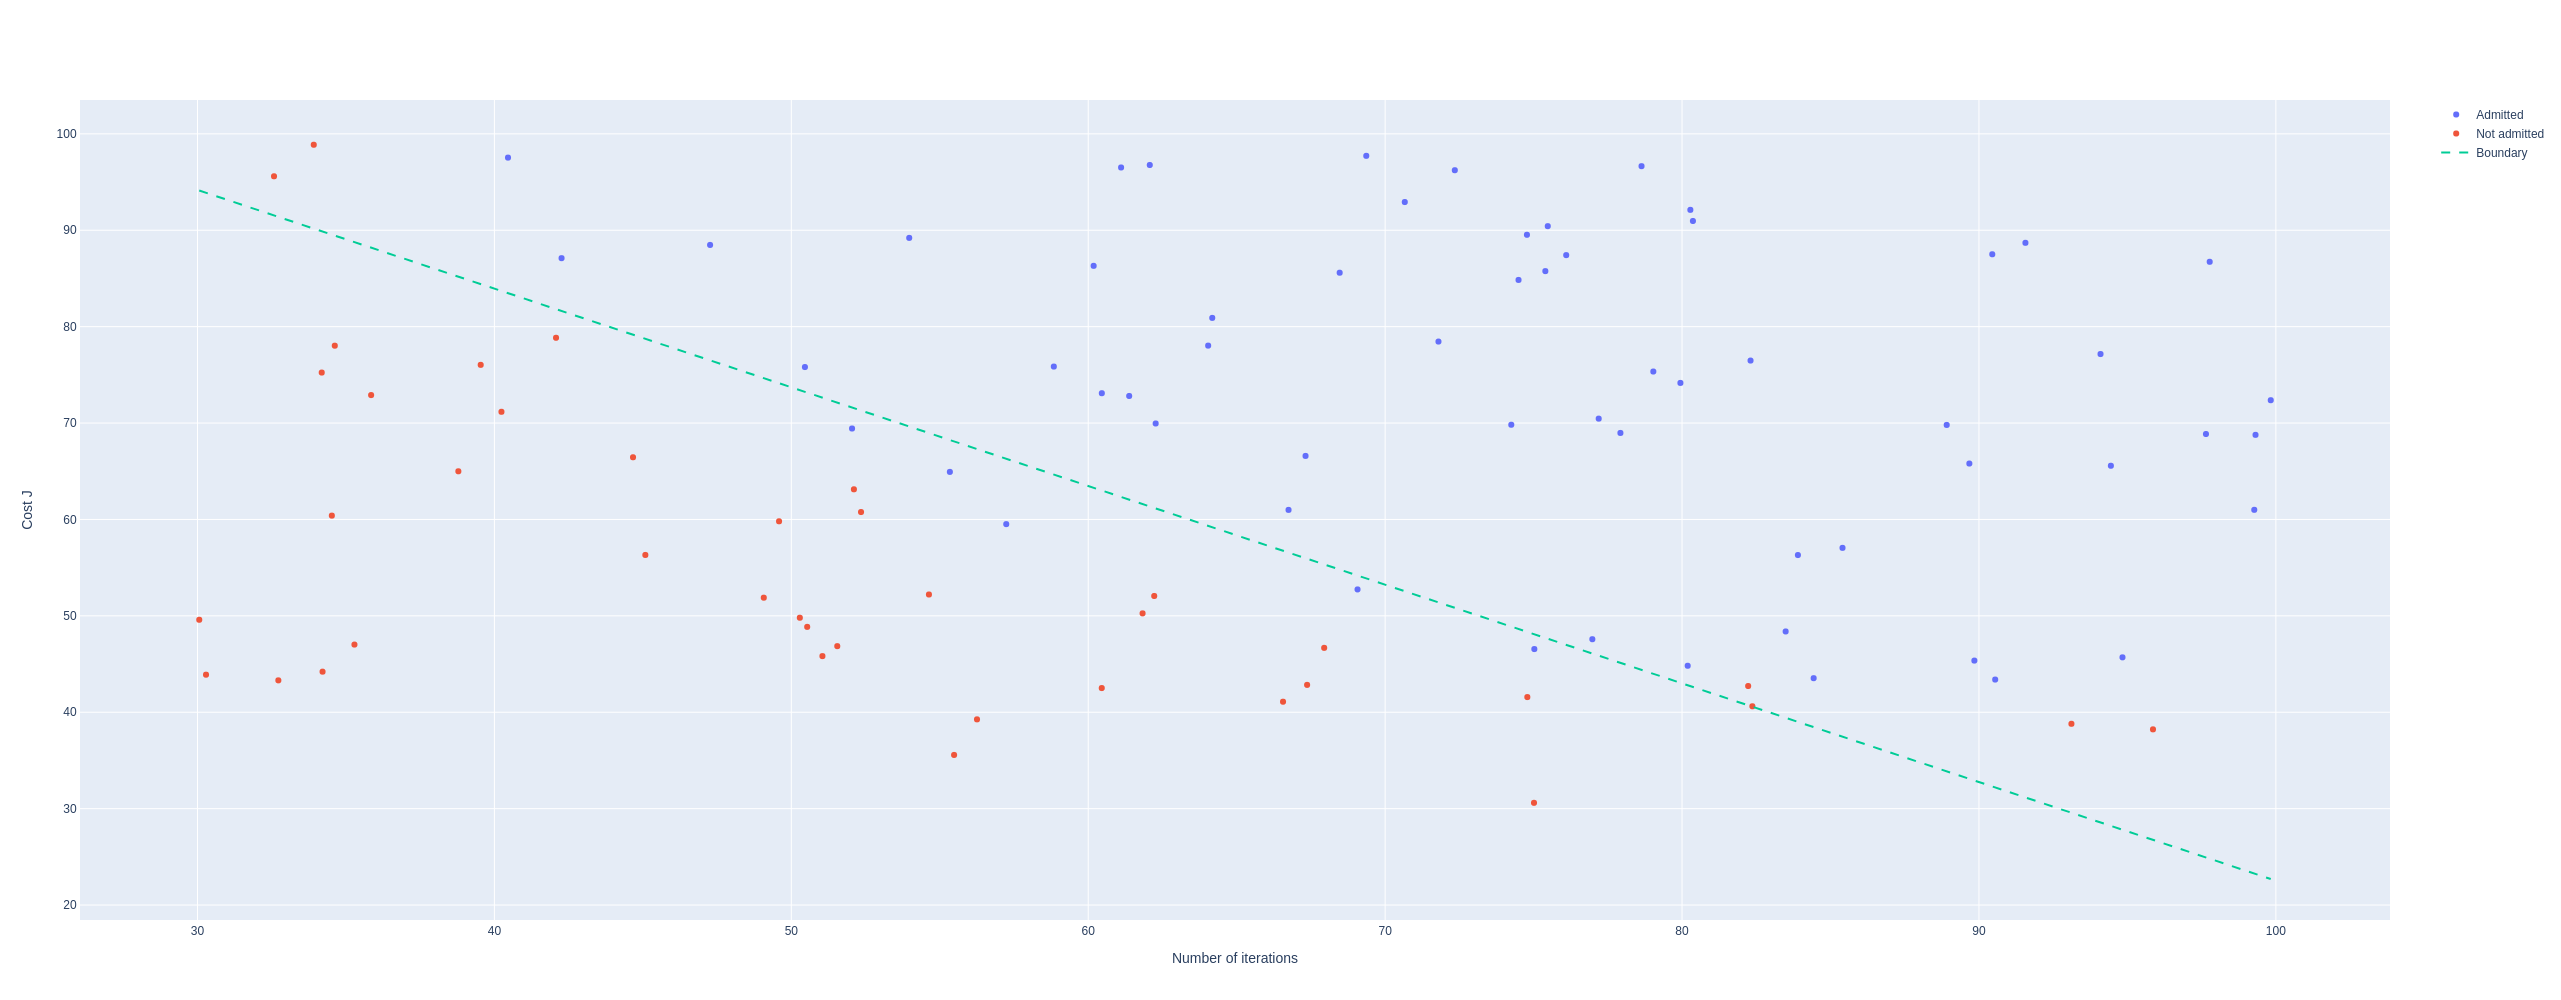

In [152]:
fig_plotly = go.Figure()

layout = go.Layout( autosize=False,
                    width=1000,
                    height=1000,
                    xaxis = dict( title_text = "Number of iterations"),
                    yaxis = dict( title_text = "Cost J") )

fig_plotly.layout = layout
fig_plotly.add_trace( trace_positive )
fig_plotly.add_trace( trace_negative )
fig_plotly.add_trace( trace_boundary )

# Predictions

In [194]:
prob = sigmoid( np.dot( np.array([1,45,85]), theta ) )

In [195]:
print(f'For a student with scores 45 and 85, we predict an admission probability of { prob } ')
print(f'Expected value: 0.775 +/- 0.002')

For a student with scores 45 and 85, we predict an admission probability of 0.7762915904112411 
Expected value: 0.775 +/- 0.002


In [196]:
def predict(theta, X ):
    
    m = np.shape(X)[0]
    
    p = np.zeros(m)
    
    values = sigmoid( np.dot( np.array(X), theta ) )
    
    p[values>=0.5] =1
    
    return p

In [197]:
p = predict(theta, X)


In [198]:
print(f'Train Accuracy: { np.mean(p == y) * 100  } ') 
print(f'Expected accuracy (approx): 89.0\n');

Train Accuracy: 89.0 
Expected accuracy (approx): 89.0

